In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



#ts = macrodata['unemp']
ts = pd.read_csv('./Bond Index (Edited).csv',header=None)
ts.iloc[:,0] = pd.to_numeric(ts.iloc[:,0],errors='coerce') # if any non numeric, convert to numeric, else NAN, therefore header change to NAN if any
ts.dropna(inplace=True) #drop NAN if any

# split into train test
train_ratio = 0.8
train_idx = list(range(int(len(ts)*train_ratio)))
print(train_idx[:5]) # first 5
print(train_idx[-5:]) # last 5 of training
train = ts.iloc[train_idx] # training
test = ts.iloc[~ts.index.isin(train_idx)] # test are those not in train

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[0, 1, 2, 3, 4]
[1040, 1041, 1042, 1043, 1044]


In [2]:

decomposition = seasonal_decompose(train, model='additive', freq=2)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)

              0
1           NaN
2     2594.8150
3     2599.1850
4     2598.7675
5     2597.6125
...         ...
1053  3239.7650
1055  3238.7175
1056  3235.1600
1057  3234.2825
1058        NaN

[1045 rows x 1 columns]
             0
1     0.175748
2    -0.175748
3     0.175748
4    -0.175748
5     0.175748
...        ...
1053  0.175748
1055 -0.175748
1056  0.175748
1057 -0.175748
1058  0.175748

[1045 rows x 1 columns]
             0
1          NaN
2     0.510748
3     3.349252
4    -2.421752
5     2.231752
...        ...
1053 -0.870748
1055 -0.051752
1056  3.484252
1057 -9.596752
1058       NaN

[1045 rows x 1 columns]


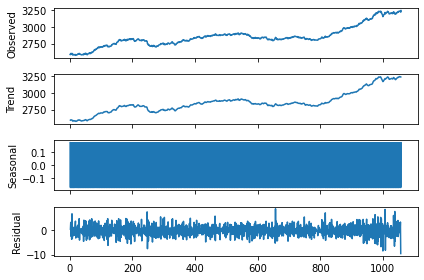

In [3]:

from matplotlib import pyplot
decomposition.plot()
pyplot.show()

In [4]:
#prediction or compose back

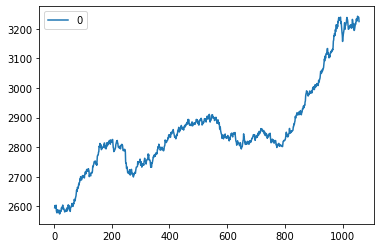

Length of test set is : 275
Without customized rmse is :  332.54167927098047


In [5]:
#Without Customization (On Test Set) Additive
y_pred =  trend + seasonal + residual
y_pred.plot()
pyplot.show() #on trainset

# On Test Set
import math
from sklearn.metrics import mean_squared_error
print(f'Length of test set is : {len(test)}') #note train is 1045
# Take the last few value of train as y_pred
y_pred_last_n = y_pred.dropna()[-len(test):]

# rmse if squared = False
# RMSE
rmse = math.sqrt(mean_squared_error(y_pred_last_n, test))
print("Without customized rmse is : ", rmse)

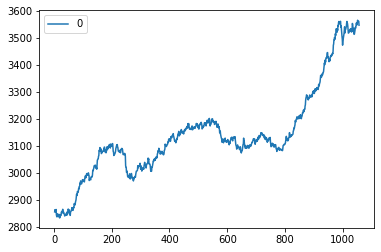

Length of test set is : 275
Customized rmse is :  102.47670931495894


In [11]:
#With Customization
y_pred =  1.1*trend + 1.1*seasonal + residual
y_pred.plot()
pyplot.show() 

# testing
import math
from sklearn.metrics import mean_squared_error
print(f'Length of test set is : {len(test)}') #note train is 1045
# Take the last few value of train as y_pred
y_pred_last_n = y_pred.dropna()[-len(test):]

# rmse if squared = False
# RMSE
rmse = math.sqrt(mean_squared_error(y_pred_last_n, test))
print("Customized rmse is : ", rmse)

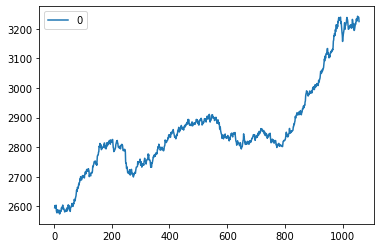

In [21]:
# Multiplicative
# on Train Set
# y(t) = Level * Trend * Seasonality * Noise
# if multiplicative used

decomposition = seasonal_decompose(train, model='multiplicative', freq=2)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

y =  trend * seasonal * residual
y.plot()
pyplot.show()

In [24]:
#With Customization
y_pred =  1.1*trend *seasonal * residual

# testing
print(f'Length of test set is : {len(test)}') #note train is 1045
# Take the last few value of train as y_pred
y_pred_last_n = y_pred.dropna()[-len(test):]

# rmse if squared = False
# RMSE
rmse = math.sqrt(mean_squared_error(y_pred_last_n, test))
print("Customized Multiplicative rmse is : ", rmse)

Length of test set is : 275
Customized Multiplicative rmse is :  102.49156388003135
